<a href="https://colab.research.google.com/github/arpitvijayvargia/naive-bayes/blob/master/Heart_Diseases_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#I uploaded the dataset in my drive manually
#mounting drive to upload data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#importing library 
import pandas as pd
#importing dataset from the drive
dataset = pd.read_csv('/content/drive/My Drive/Heart-Disease-Prediction-master/dataset.csv')
#lets's see the shape of our data
dataset.shape

(303, 14)

In [3]:
#let's view first 5 rows of our dataset 
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#let's check if their is any null values in our feature column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#let's see some of our charterstics of our dataset 
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
#importing data visualisation library
import matplotlib.pyplot as plt

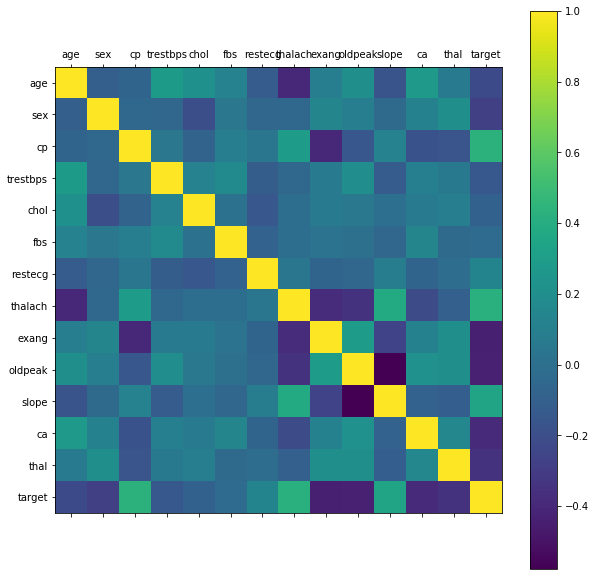

In [49]:
#let's see the relation between our feature vectors by constructing corealtion mattrix
import numpy as np
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10, 10
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

# As we can see from above that some of our feature vectors have negative corelation with our target variable.
So lets check for each feature by ploting histogram of each feature 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f003987ef60>,
      dtype=object)

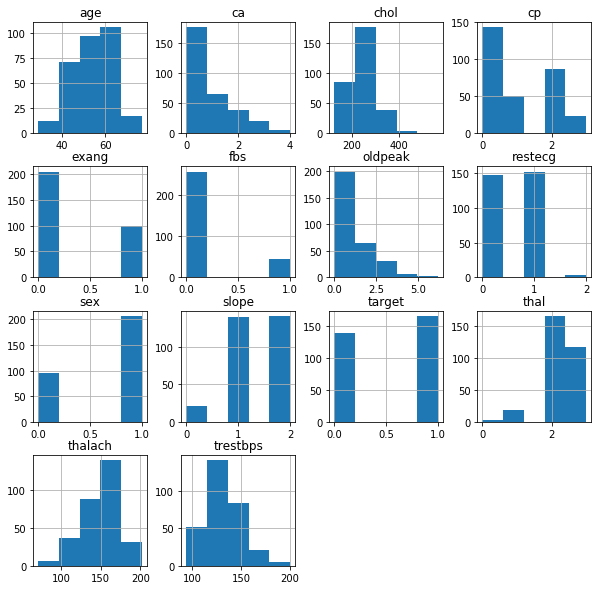

In [10]:
dataset.hist(bins= 5)

As we can see that our feature variables are not scaled so we will use minmax scaler to scale it

In [0]:
from sklearn.preprocessing import MinMaxScaler
standardScaler = MinMaxScaler
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler().fit_transform(dataset[columns_to_scale])

Let's check if our target class has same number of data or not and if not then it may result in bias data or poor accuracy of classifier

Text(0, 0.5, 'Frequency')

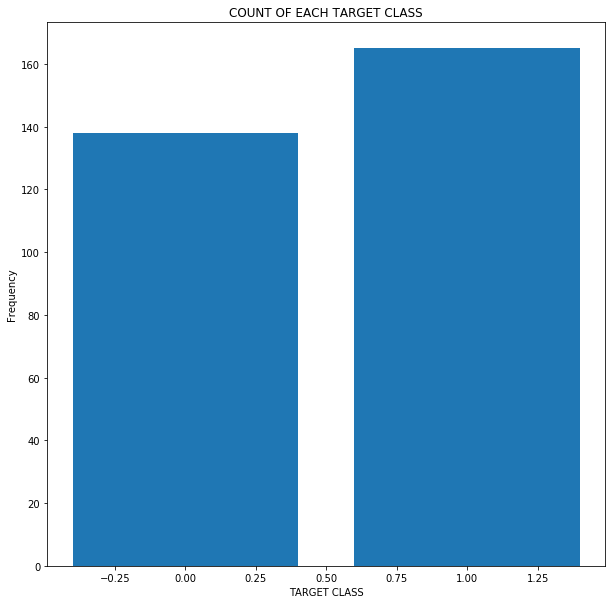

In [14]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = dataset['target'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('COUNT OF EACH TARGET CLASS') 
ax.set_xlabel('TARGET CLASS') 
ax.set_ylabel('Frequency')

# As we can see form above that our both class don't have equal number but have almost same number of data so we can continue with it.

We have performed all the preprocessing task and now our data is ready for classification.
So first we have to seperate our data into training and testing data.

training data = 80% of data

testing data =  data - training data

NOTE: its upto you how much you take in training and testing.
i am using train_test-split from sklearn to perfrom this task

In [0]:
from sklearn.model_selection import train_test_split
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Naive Bayes Classifier

In [0]:
#importing naive bayes and accuracy mattrix to measure model performance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [29]:
model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
predict_train = model.predict(X_train)
print('Target on train data',predict_train)

Target on train data [1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1
 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1]


In [35]:
# predict the target on the train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train*100)

accuracy_score on train dataset :  83.47107438016529


In [37]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test)

Target on test data [0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [38]:
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test*100)

accuracy_score on test dataset :  85.24590163934425


# Our classifier performed well on the data and gave 85.24% accuracy on testing data

let's check for the KNN as it performs well for bi-class dataset and also give good accuracy with less data

## KNN(K nearest neighbors)

In [0]:
#below is the code for the knn classifier with neighbors ranging from 1-4
knn_scores = []
for k in range(1,5):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [48]:
knn_scores

[0.8360655737704918, 0.7868852459016393, 0.8852459016393442, 0.819672131147541]

In [42]:
print("We got highest accuracy of {}% with {} nieghbors in KNN clasifier".format(knn_scores[2]*100, 3))

We got highest accuracy of 88.52459016393442% with 3 nieghbors in KNN clasifier


# Our KNN classifier gave us a highest accuracy of  approx 89% and which is excellent based on our data.